In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
#Dependent rent, y
#Independent area, x
x = df.drop('rent', axis=1)

In [5]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [6]:
x.shape

(60, 1)

In [7]:
# x = df[['area']]

In [8]:
#df.drop('rent', axis=1, inplace=True) #ignore

In [9]:
y = df['rent']
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# viz

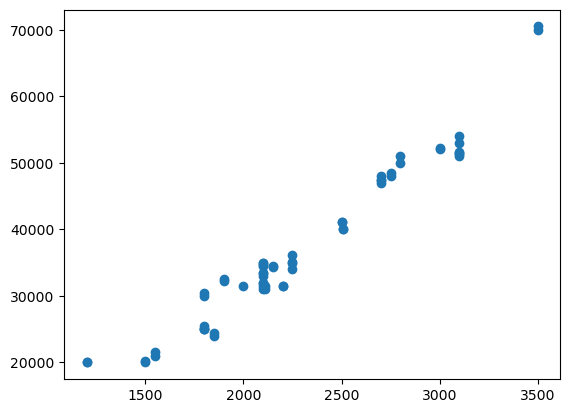

In [10]:
plt.scatter(x, y)

Text(0, 0.5, 'Rent in Taka')

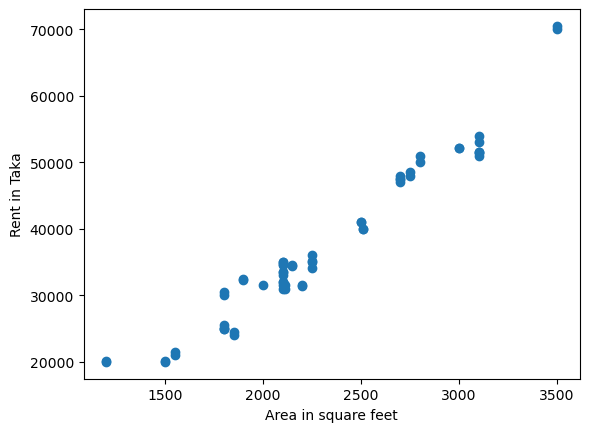

In [11]:
plt.scatter(x, y)
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Taka')

In [12]:
x.mean()

area    2289.0
dtype: float64

In [13]:
y.mean()

37269.166666666664

# Data Split

In [14]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(df, test_size=.30)

In [15]:
train.head()

,area,rent
8,2700,48000
13,2510,40050
50,2110,31000
10,2150,34500
47,1550,21500


In [16]:
train.shape

(42, 2)

In [17]:
df.shape

(60, 2)

In [18]:
test.shape

(18, 2)

# Seperate train and test for xtrain, xtest, ytrain, ytest

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30, random_state=42)

In [20]:
xtrain.head()

,area
40,2150
4,3000
43,2510
19,2700
34,3000


In [21]:
ytrain.head()

40    34400
4     52100
43    40000
19    47000
34    52200
Name: rent, dtype: int64

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [23]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [24]:
reg.coef_

array([20.68636687])

In [25]:
reg.intercept_

-10252.904740336751

In [26]:
reg.predict([[2510]])

array([41669.87610729])

In [27]:
#Y = (M*X) + C
Y = ((reg.coef_)*2510)+(reg.intercept_)
Y

array([41669.87610729])

# SAVE ML models

In [28]:
import pickle as pk
import joblib as jb

In [29]:
with open('lr1', 'wb') as files: #saving
    pk.dump(reg, files)

In [30]:
with open('lr1', 'rb') as file: #reading
    reg1 = pk.load(file)

In [31]:
reg1.predict([[2510]])

array([41669.87610729])

# Joblib

In [32]:
jb.dump(reg, 'lr2')

['lr2']

In [33]:
reg2 = jb.load('lr2')

In [34]:
reg2.predict([[2510]])

array([41669.87610729])